# Using open data with Jupyter notebooks

This notebook highlights how to use and work with open data using Jupyter notebooks in comparison to a more traditional approach of using standard, desktop tools to perform an open data assignment. 

The goal of the exercise is to use current National Hockey League (NHL) results to determine whether a team is on pace for making the playoffs. 

## Traditional approach

### Tool 1
Traditionally, students would have had to go to a particular website to access the data:
    http://www.hockey-reference.com/teams/CGY/2017_games.html

<img src="opendata_imgs/cgy_standings.png" width="500px" />

### Tool 2
From there, they would have to manually copy and paste the data into a tool such as Microsoft Excel. 

<img src="opendata_imgs/cgy_excel.png" width="100%"/>

...and create some graph...

![title](opendata_imgs/cgy_excel_graph.png)

### Tool 3
...that is then copied and pasted into Microsoft Word in order to write up a final report. 

![title](opendata_imgs/cgy_word.png)

In total, that means the students would need to use the following tools:
- a web browser
- Microsoft Excel or something like it
- Microsoft Word or something similar

The final product is usually a static snapshot in time. 

## Jupyter notebooks approach

Using Jupyter notebooks, the entire analysis can be done in one tool, requiring only a web browser. The end product is an interactive notebook that combines active code along with the explanatory narrative for how the analysis was conducted - literate programming - which can be interpreted by anyone. 

Start by installing some libraries that are needed to accomplish the tasks. Once these are installed once, they won't have to be installed again.

In [ ]:
install.packages(c("RCurl", "XML", "plyr", "ggplot2"))

Load the libraries: 

In [1]:
library(RCurl)
library(XML)
library(plyr)
library(ggplot2)

Loading required package: bitops


Now, let's look at the data and load it directly into the Jupyter notebook from the site we previously manually visited: 

In [2]:
readHTMLTable("http://www.hockey-reference.com/teams/CGY/2017_games.html", header=T)

GP,Date,Time,,Opponent,GF,GA,.1,.2,W,⋯,SHG,,S,PIM,PPG,PPO,SHG.1,Att.,LOG,Notes
1,2016-10-12,10:00 PM,@,Edmonton Oilers,4,7,L,,0,⋯,2,,28,13,1,6,0,"18,347",2:35,
2,2016-10-14,9:00 PM,,Edmonton Oilers,3,5,L,,0,⋯,0,,29,14,2,4,1,"19,289",2:28,
3,2016-10-15,10:00 PM,@,Vancouver Canucks,1,2,L,SO,0,⋯,0,,31,6,0,4,0,"18,865",2:42,
4,2016-10-18,9:00 PM,,Buffalo Sabres,4,3,W,OT,1,⋯,0,,21,14,1,5,0,"19,289",2:35,
5,2016-10-20,9:00 PM,,Carolina Hurricanes,2,4,L,,1,⋯,0,,32,12,2,8,0,"17,652",2:29,
6,2016-10-22,10:00 PM,,St. Louis Blues,4,6,L,,1,⋯,0,,40,8,2,4,0,"18,076",2:33,
7,2016-10-24,8:30 PM,@,Chicago Blackhawks,3,2,W,SO,2,⋯,0,,33,10,0,2,0,"21,348",2:51,
8,2016-10-25,8:00 PM,@,St. Louis Blues,4,1,W,,3,⋯,0,,24,8,1,4,0,"17,337",2:25,
9,2016-10-28,9:00 PM,,Ottawa Senators,5,2,W,,4,⋯,0,,33,4,2,4,0,"18,132",2:36,
10,2016-10-30,9:30 PM,,Washington Capitals,1,3,L,,4,⋯,0,,29,4,1,2,0,"18,454",2:25,


Clean the data and calculate the number of points the team has accumulated.

In [3]:
cgy_results <- readHTMLTable("http://www.hockey-reference.com/teams/CGY/2017_games.html", header=T)
results.clean <- cgy_results$games

results.clean <- results.clean[results.clean$Opponent!='Opponent',]
results.clean <- results.clean[,c(1,2,5,6,7,10,11,12)]

results.clean$W <- as.integer(as.character(results.clean$W))
results.clean$L <- as.integer(as.character(results.clean$L))
results.clean$OL <- as.integer(as.character(results.clean$OL))
results.clean$GP <- as.integer(as.character(results.clean$GP))

results.clean$Points <- (results.clean$W) * 2 + results.clean$OL * 1

Create a plot to see how the team has been accumulating points

Warning message:
“Removed 2 rows containing missing values (geom_point).”

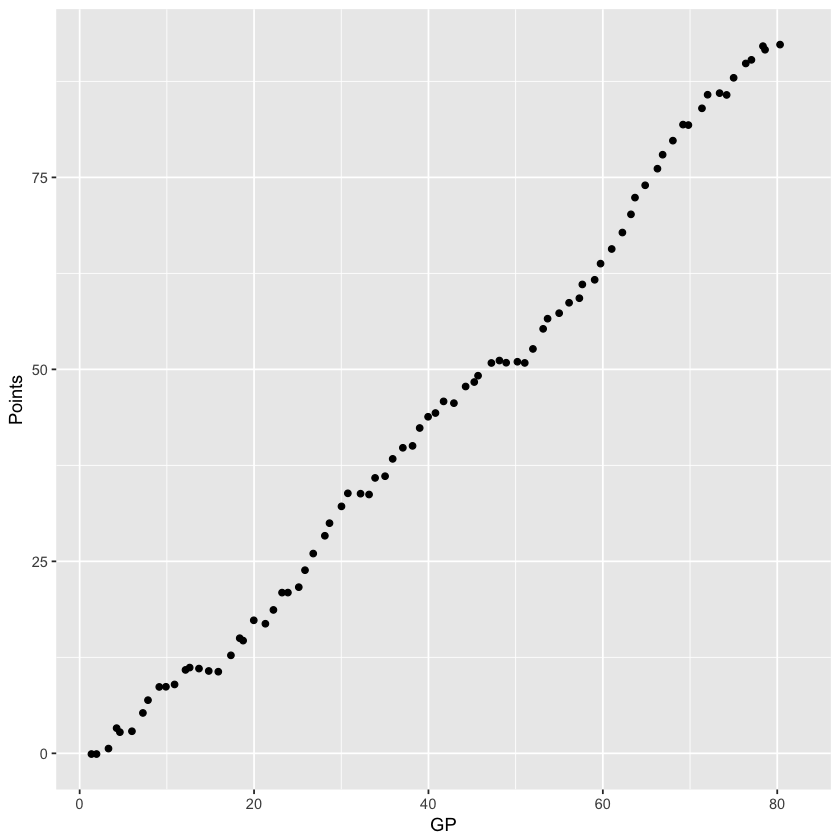

In [4]:
p <- ggplot(data=results.clean, aes(x=GP, y=Points)) + geom_jitter() 
p

Let's add a line for how many points they should have in order to get to 96 points at the end of the season, which pretty much guarantees a playoff spot. 

In [5]:
results.clean$PtsPace <- results.clean$GP * (96/82.0)

Warning message:
“Removed 2 rows containing missing values (geom_path).”

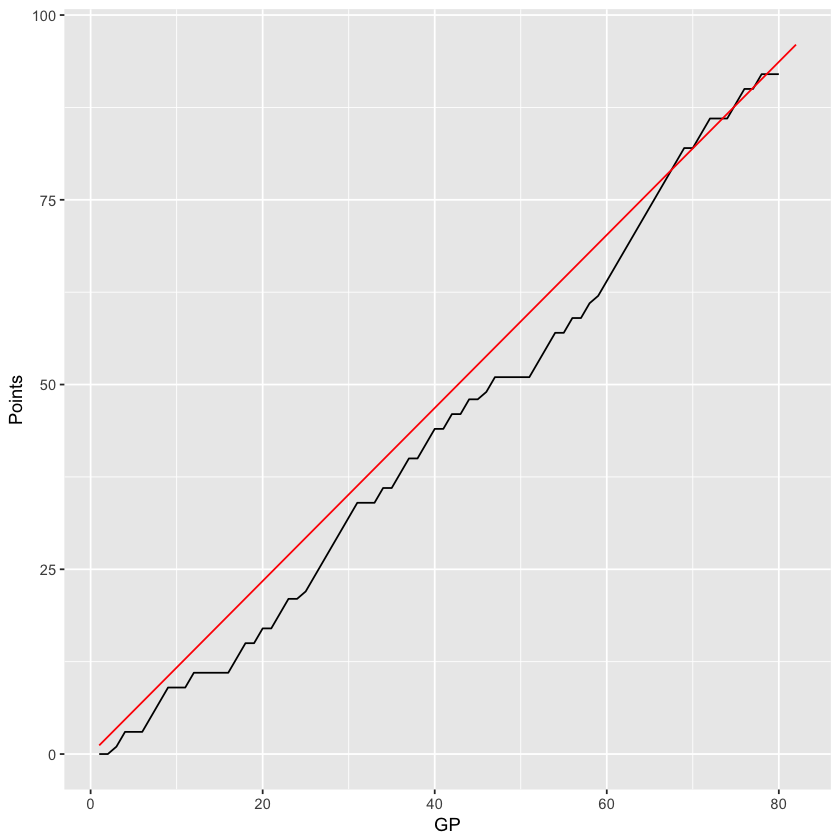

In [6]:
p <- ggplot(data=results.clean, aes(x=GP, y=Points)) + geom_line() + geom_line(aes(x = GP, y=PtsPace), colour="red") 
p

Mark-up the figure in order to make it a bit easier to understand. 

Warning message:
“Removed 2 rows containing missing values (geom_path).”

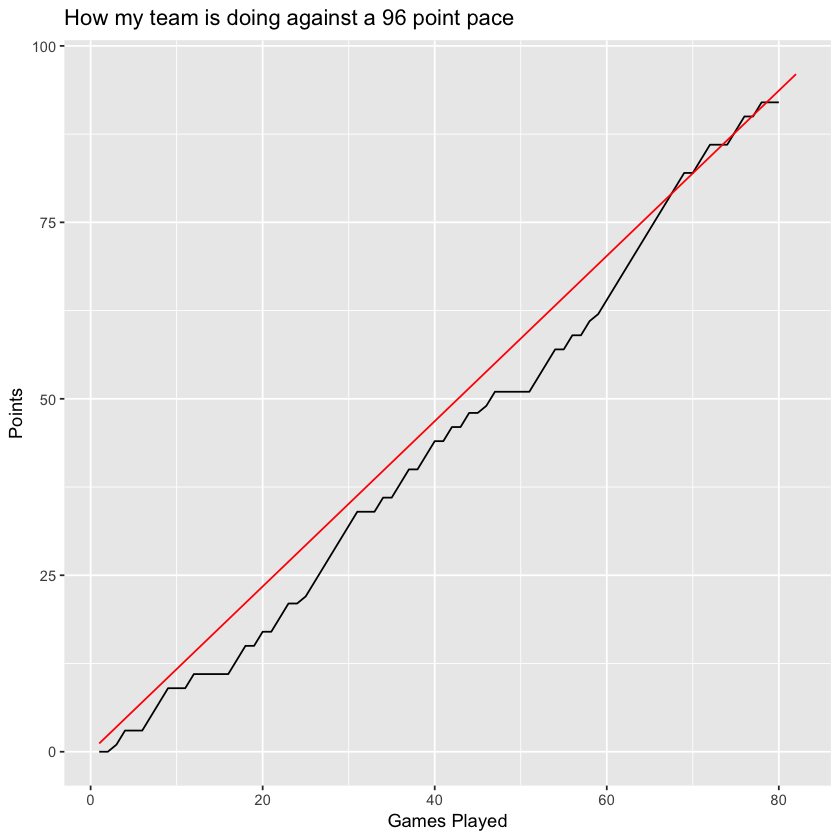

In [7]:
p.title <- list(labs(title="How my team is doing against a 96 point pace"), xlab("Games Played"), ylab("Points"))
p + p.title

In conclusion, the Flames are on pace to make the playoffs.